## Import Library yg dibutuhkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings 
from sklearn import metrics 
import seaborn as sns
from collections import Counter
warnings.filterwarnings("ignore")
%matplotlib inline

#tambahkan library sesuai kebutuhan

In [ ]:
url = 'https://raw.githubusercontent.com/FerdiErs/Test1/main/data.csv'

data = pd.read_csv(url)

In [ ]:
data.head()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PH              600 non-null    float64
 1   cahaya          590 non-null    object 
 2   intensitas air  616 non-null    object 
 3   suhu            589 non-null    float64
 4   PPM             611 non-null    float64
 5   tinggi air      616 non-null    int64  
 6   aksi            616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.8+ KB


## 1. Mengganti nama kolom yang menggunakan spasi

In [ ]:
#isi code
data.rename(columns={'intensitas air': 'intensitas_air', 'tinggi air' : 'tinggi_air'},inplace= True)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [ ]:
#Isi Code
### Data kategorikal = Cahaya , Intensitas_air , aksi 

def getcahaya(str) : 
  if str=="Ada":
    return 1
  elif str=='Tidak ada': 
    return 2 
  else : 
    return str 

data["cahaya"]=data["cahaya"].apply(getcahaya)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


In [ ]:
def getInt(str): 
  if str=="Tinggi" :
    return 1.0
  elif str=="Cukup" : 
    return 2.0
  elif str=='Rendah' :
    return 3.0
  elif str=='Rendah sekali' :
    return 4.0
  else : 
    return str 
    
data["intensitas_air"]=data["intensitas_air"].apply(getInt)
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,1.0,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,1.0,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,1.0,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,1.0,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,1.0,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,1.0,4.0,25.3,904.0,47,Hidupkan Lampu
612,2.1,1.0,4.0,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,1.0,4.0,25.3,793.0,19,Hidupkan Lampu
614,1.4,1.0,4.0,25.4,1052.0,3,Hidupkan Lampu


In [ ]:
def getAksi(str):
   
  if str =="Hidupkan Lampu dan Pompa nutrisi TDS":
    return 1
  elif str == "Tidak melakukan apa-apa": 
    return 2 
  elif str=="Hidupkan Lampu": 
    return 3 
  elif str=='Hidupkan Pompa nutrisi TDS':
    return 4
  else :
    return str 

data["aksi"]=data["aksi"].apply(getAksi)
data 

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,1.0,27.0,188.0,622,1
1,5.7,1.0,1.0,26.9,79.0,557,1
2,6.0,1.0,1.0,27.0,11.0,491,1
3,6.5,1.0,1.0,27.1,345.0,12000,2
4,6.2,NaN,1.0,27.1,602.0,444,2
...,...,...,...,...,...,...,...
611,4.6,1.0,4.0,25.3,904.0,47,3
612,2.1,1.0,4.0,25.0,388.0,18,1
613,3.2,1.0,4.0,25.3,793.0,19,3
614,1.4,1.0,4.0,25.4,1052.0,3,3


In [ ]:
#Isi Code
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


## 3. Handle Missing Value

In [ ]:
data.mean()

PH                   6.655167
cahaya               1.488136
intensitas_air       2.500000
suhu                29.364007
PPM               1032.836334
tinggi_air         288.173701
aksi                 2.125000
dtype: float64

In [ ]:
### fillna untuk mengisi nilai yg nan
data.fillna(data.mean(),inplace=True) 
data

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.000000,1.0,27.0,188.0,622,1
1,5.7,1.000000,1.0,26.9,79.0,557,1
2,6.0,1.000000,1.0,27.0,11.0,491,1
3,6.5,1.000000,1.0,27.1,345.0,12000,2
4,6.2,1.488136,1.0,27.1,602.0,444,2
...,...,...,...,...,...,...,...
611,4.6,1.000000,4.0,25.3,904.0,47,3
612,2.1,1.000000,4.0,25.0,388.0,18,1
613,3.2,1.000000,4.0,25.3,793.0,19,3
614,1.4,1.000000,4.0,25.4,1052.0,3,3


## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

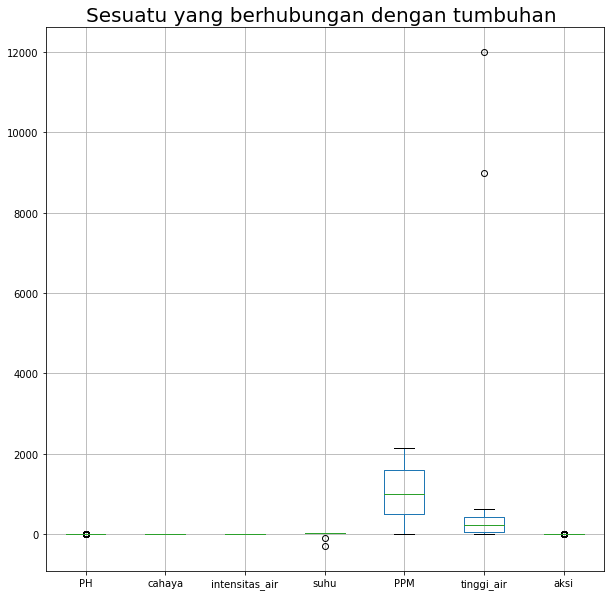

In [ ]:
num_cols = ['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(10,10))
data[num_cols].boxplot()
plt.title("Sesuatu yang berhubungan dengan tumbuhan ", fontsize=20)
plt.show()

In [ ]:
data.median()

PH                  6.500000
cahaya              1.488136
intensitas_air      2.500000
suhu               29.500000
PPM               995.500000
tinggi_air        230.000000
aksi                2.000000
dtype: float64

In [ ]:
data['tinggi_air']

0        622
1        557
2        491
3      12000
4        444
       ...  
611       47
612       18
613       19
614        3
615       19
Name: tinggi_air, Length: 616, dtype: int64

### Menghilangkan Outliers dengan median 

In [ ]:
print(data['tinggi_air'].quantile(0.50)) 
print(data['tinggi_air'].quantile(0.95)) 
data['tinggi_air'] = np.where(data['tinggi_air'] > 592, 230, data['tinggi_air'])
data.describe()

230.0
591.75


,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,6.655167,1.488136,2.500000,29.364007,1032.836334,236.878247,2.125000
std,3.003387,0.489594,1.118943,14.605947,630.037913,183.345513,0.524792
min,0.000000,1.000000,1.000000,-300.000000,1.000000,0.000000,1.000000
25%,5.500000,1.000000,1.750000,27.100000,490.500000,50.000000,2.000000
50%,6.500000,1.488136,2.500000,29.500000,995.500000,229.500000,2.000000
75%,7.525000,2.000000,3.250000,32.900000,1603.000000,394.250000,2.000000
max,14.000000,2.000000,4.000000,40.600000,2149.000000,591.000000,4.000000


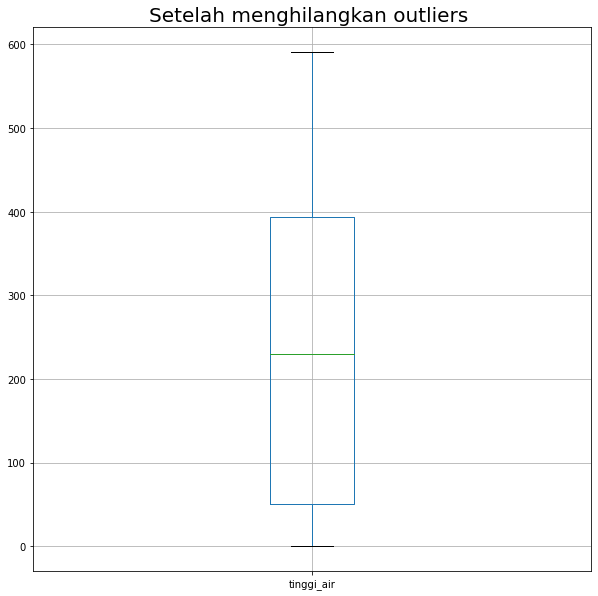

In [ ]:
num_cols = ['tinggi_air']
plt.figure(figsize=(10,10))
data[num_cols].boxplot()
plt.title("Setelah menghilangkan outliers ", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [ ]:
#Isi Code
# Memisahkan antara fitur dan label

# Fitur
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Mengambil kolom index ke-0 sampai ke-5
X = data.iloc[:,:6].values

# Label
# iloc[rows,columns] (Slicing pada dataframe)
# Mengambil semua data dalam barisan.
# Hanya Mengambil kolom index ke-6
Y = data.iloc[:,6].values


## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [ ]:
X = data.iloc[:,:6].values
X

array([[6.500e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.880e+02, 2.300e+02],
       [5.700e+00, 1.000e+00, 1.000e+00, 2.690e+01, 7.900e+01, 5.570e+02],
       [6.000e+00, 1.000e+00, 1.000e+00, 2.700e+01, 1.100e+01, 4.910e+02],
       ...,
       [3.200e+00, 1.000e+00, 4.000e+00, 2.530e+01, 7.930e+02, 1.900e+01],
       [1.400e+00, 1.000e+00, 4.000e+00, 2.540e+01, 1.052e+03, 3.000e+00],
       [5.000e+00, 1.000e+00, 4.000e+00, 2.530e+01, 9.770e+02, 1.900e+01]])

In [ ]:
Y = data.iloc[:,6].values
Y

array([1, 1, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 1, 1, 1,

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#Isi Code
counter = Counter(Y)
print(counter)

Counter({2: 473, 3: 92, 1: 39, 4: 12})


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [ ]:
counter = Counter(Y_smote)
print(counter)

Counter({1: 473, 2: 473, 3: 473, 4: 473})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

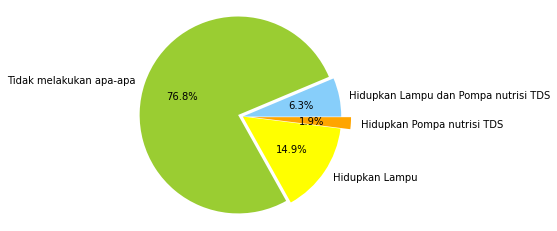

In [ ]:
aksi1 = (data['aksi'] == 1).sum() 
aksi2 = (data['aksi'] == 2).sum() 
aksi3 = (data['aksi'] == 3).sum() 
aksi4 = (data['aksi'] == 4).sum() 
# print(males)
# print(females)
p = [aksi1,aksi2,aksi3,aksi4]
plt.pie(p,    #giving array
        autopct='%1.1f%%',
       labels = ["Hidupkan Lampu dan Pompa nutrisi TDS","Tidak melakukan apa-apa","Hidupkan Lampu",'Hidupkan Pompa nutrisi TDS'], #Correspndingly giving labels
       colors = ['lightskyblue','yellowgreen','Yellow','Orange'],   # Corresponding colors
       explode = (0,0.05,0,0.1),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal') 
plt.show()

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [ ]:
#Isi Kode
### definisikan X 

X = data[['PH','cahaya','intensitas_air','suhu','PPM','tinggi_air']] .values 
X[0:5]

array([[  6.5       ,   1.        ,   1.        ,  27.        ,
        188.        , 230.        ],
       [  5.7       ,   1.        ,   1.        ,  26.9       ,
         79.        , 557.        ],
       [  6.        ,   1.        ,   1.        ,  27.        ,
         11.        , 491.        ],
       [  6.5       ,   1.        ,   1.        ,  27.1       ,
        345.        , 230.        ],
       [  6.2       ,   1.48813559,   1.        ,  27.1       ,
        602.        , 444.        ]])

In [ ]:
### definisikan Y 
Y = data[['aksi']] .values 
Y[0:5]

array([[1],
       [1],
       [1],
       [2],
       [2]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
scaler =  MinMaxScaler()
# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.46428571 0.         0.         0.96007046 0.08705773 0.3891709 ]
 [0.40714286 0.         0.         0.95977686 0.03631285 0.94247039]
 [0.42857143 0.         0.         0.96007046 0.00465549 0.83079526]
 ...
 [0.22857143 0.         1.         0.95507927 0.36871508 0.0321489 ]
 [0.1        0.         1.         0.95537287 0.48929236 0.00507614]
 [0.35714286 0.         1.         0.95507927 0.45437616 0.0321489 ]]


In [ ]:
X.shape

(616, 6)

In [ ]:
Y.shape

(616, 1)

### 9. Build Model KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (554, 6) (554, 1)
Test set: (62, 6) (62, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k= 3
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
yhat = knn.predict(X_test)
yhat[0:10]

array([2, 3, 2, 2, 2, 2, 2, 3, 2, 2])

In [ ]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Test set Accuracy:  0.6935483870967742


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks))

for n in range(1,Ks+1):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train) 
    yhat=neigh.predict(X_test) 
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

mean_acc

array([0.69354839, 0.67741935, 0.69354839, 0.72580645, 0.70967742,
       0.70967742, 0.69354839, 0.72580645, 0.72580645, 0.72580645])

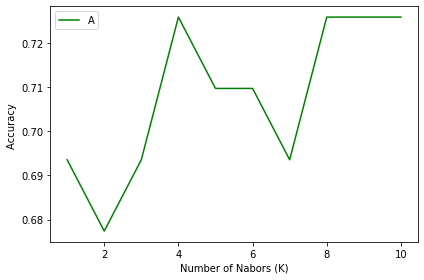

In [ ]:
plt.plot(range(1,Ks+1),mean_acc,'g')

plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7258064516129032 with k= 4
